In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
### Load data

df = pd.read_csv('/Users/xlade/Desktop/Amdari/Internship/Project_1_Cohort analysis/Dataset_ecommerce.csv')
df.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe(include = "all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [5]:
#check for missing values
df.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [6]:
## drop missing values
df.dropna(inplace = True)

In [7]:
## check for info in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [8]:
## convert our invoice to datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [9]:
df["InvoiceDate"].reset_index()

,index,InvoiceDate
0,0,2010-12-01 08:26:00
1,1,2010-12-01 08:26:00
2,2,2010-12-01 08:26:00
3,3,2010-12-01 08:26:00
4,4,2010-12-01 08:26:00
...,...,...
406824,541904,2011-12-09 12:50:00
406825,541905,2011-12-09 12:50:00
406826,541906,2011-12-09 12:50:00
406827,541907,2011-12-09 12:50:00


## Eplaratory data analysis

In [10]:
## Analysis by country
quantity_by_country = df.groupby(["Country"])["Quantity"].sum().reset_index()
quantity_by_country = quantity_by_country.sort_values("Quantity", ascending=False).reset_index()


In [11]:
quantity_by_country.head(3)

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229


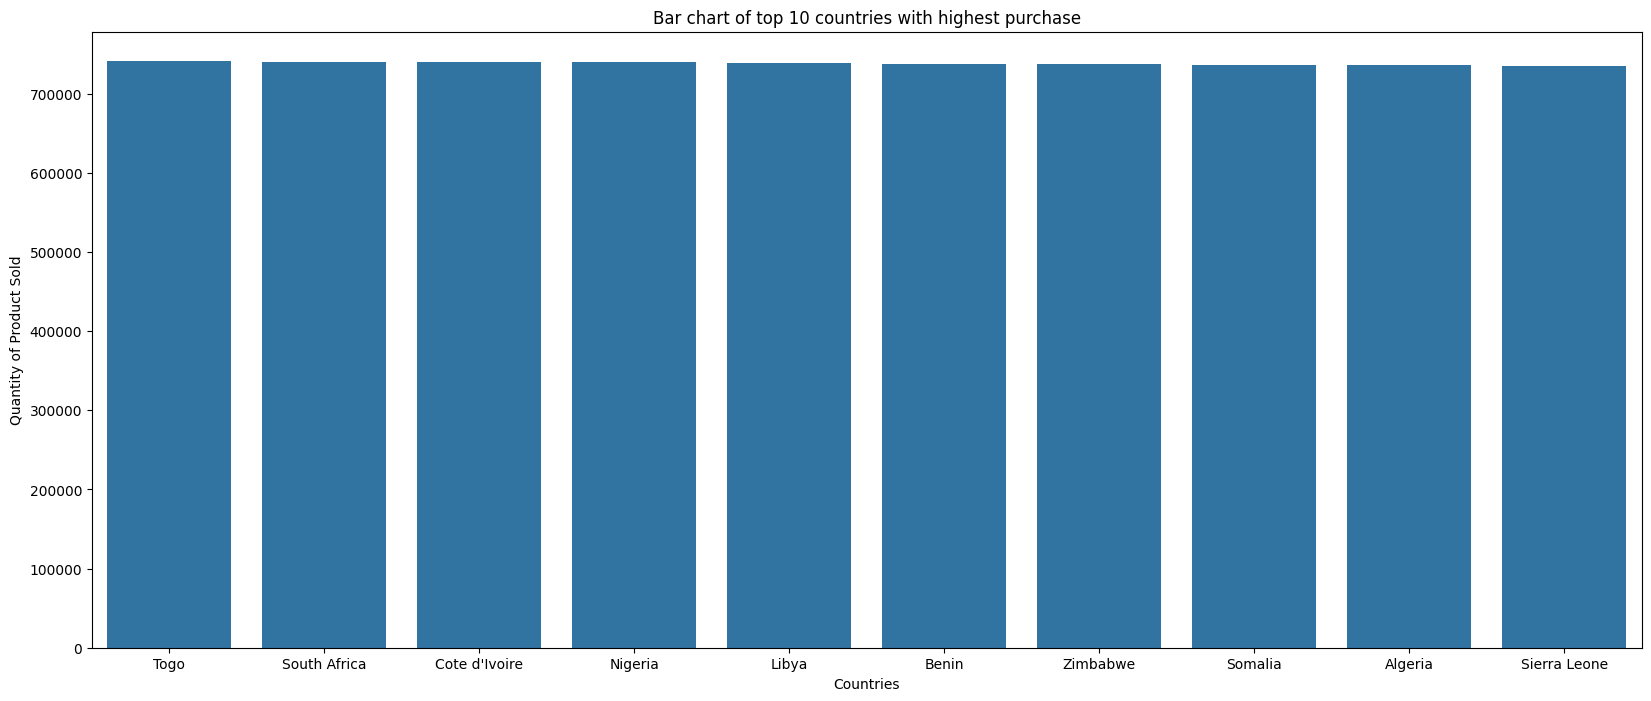

In [12]:
#visualise top ten countries where most products are sold

top_10_countries = quantity_by_country.head(10)

plt.figure(figsize = (20, 8))
ax = sns.barplot(x = "Country", y = "Quantity", data = top_10_countries)

plt.xlabel("Countries")
plt.ylabel("Quantity of Product Sold")
plt.title("Bar chart of top 10 countries with highest purchase")

plt.show()

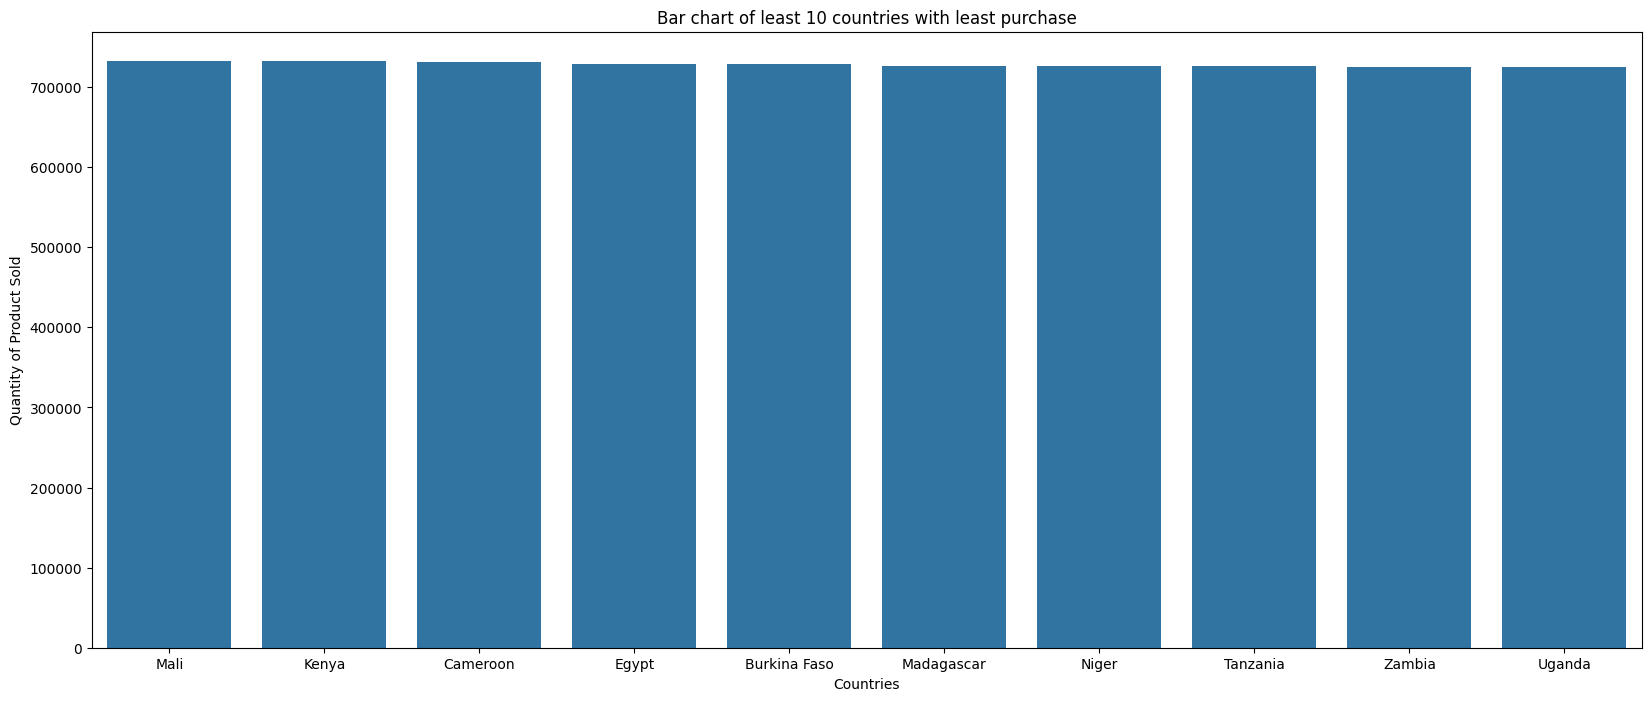

In [13]:
### Visualize the country with the least numbers of sales 


least_10_countries = quantity_by_country.tail(10)

plt.figure(figsize = (20, 8))
ax = sns.barplot(x = "Country", y = "Quantity", data = least_10_countries)

plt.xlabel("Countries")
plt.ylabel("Quantity of Product Sold")
plt.title("Bar chart of least 10 countries with least purchase")

plt.show()

In [14]:
### countries with the most numbers of customers

country_to_customer = df.groupby(["Country"])['CustomerID'].nunique().reset_index()
country_to_customer = country_to_customer.sort_values("CustomerID", ascending = False)

In [15]:
country_to_customer.head(5)

,Country,CustomerID
13,Mozambique,3072
1,Benin,3054
23,Togo,3053
15,Nigeria,3051
2,Burkina Faso,3049


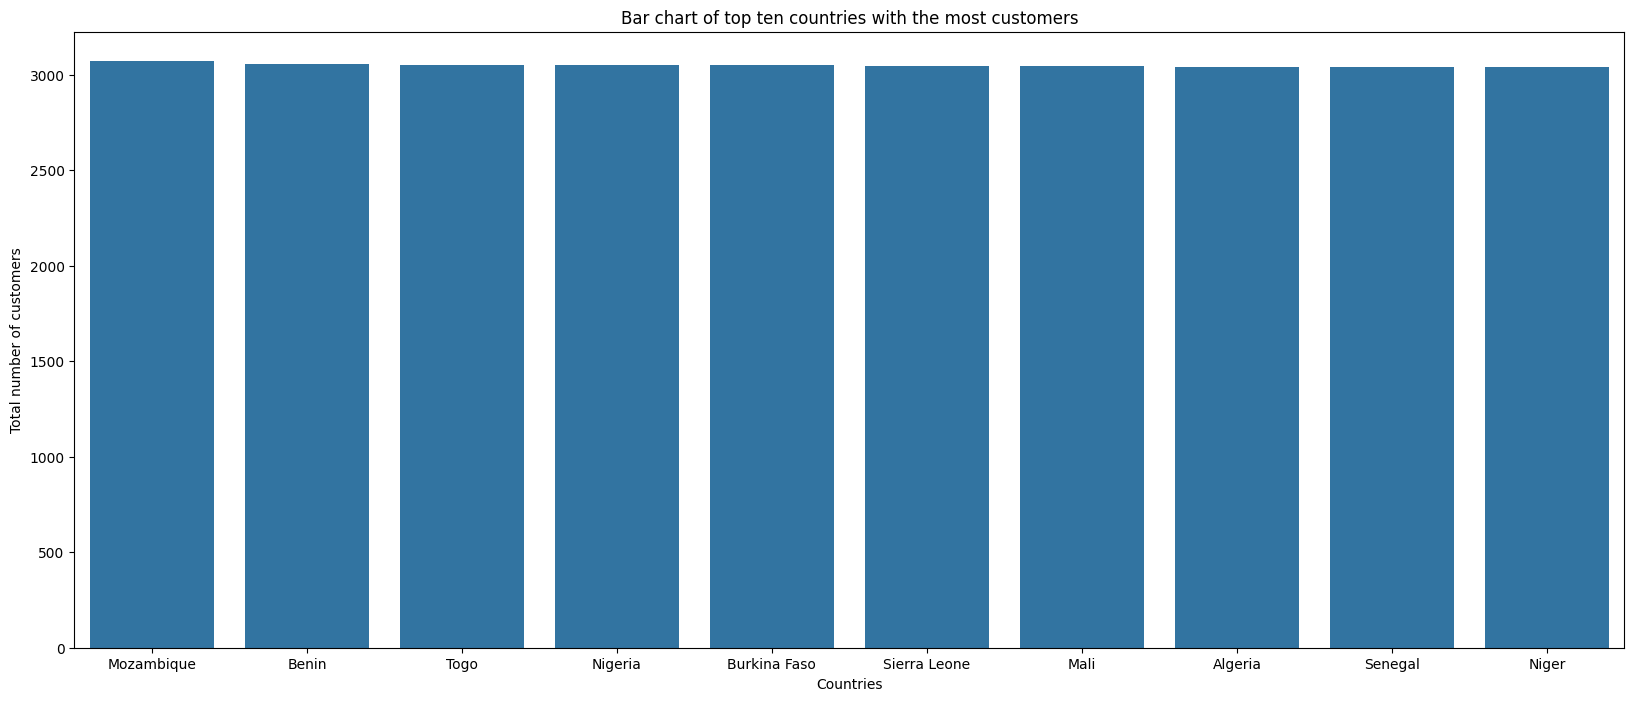

In [16]:
## draw a top ten countries with the most customers

top_countries_to_customer = country_to_customer.head(10)

plt.figure(figsize = (20, 8))

sns.barplot(x = "Country", y = "CustomerID", data = top_countries_to_customer)

plt.xlabel("Countries")
plt.ylabel("Total number of customers")
plt.title("Bar chart of top ten countries with the most customers")

plt.show()

In [17]:
##sales trend visualization
monthly_sales = df.groupby(df["InvoiceDate"].dt.to_period("M"))["Quantity"].sum()
monthly_sales

InvoiceDate
2010-12    1350834
2011-01    1105886
2011-02    1033468
2011-03    1406617
2011-04    1175052
2011-05    1459981
2011-06    1402857
2011-07    1388119
2011-08    1387695
2011-09    2061181
2011-10    2559609
2011-11    3313177
2011-12     891630
Freq: M, Name: Quantity, dtype: int64

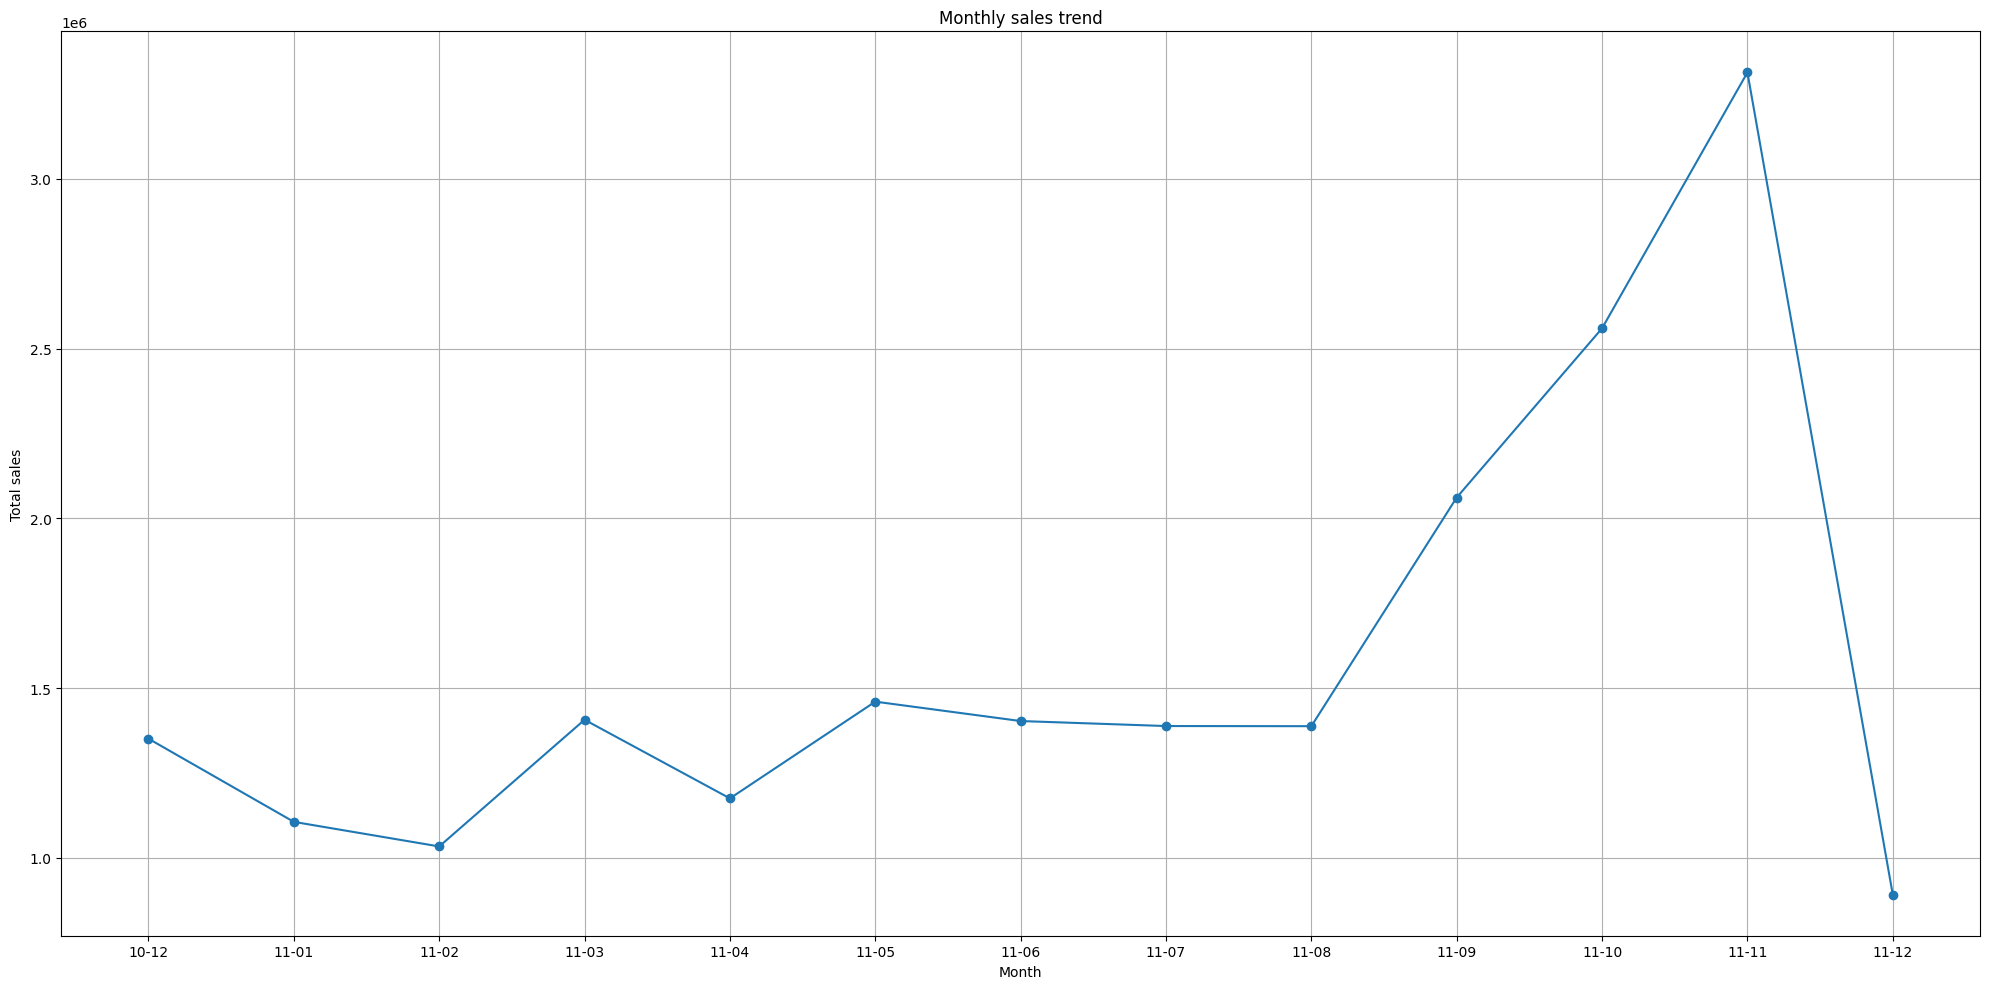

In [18]:
## create a line plot

plt.figure(figsize =(20, 10))

plt.plot(monthly_sales.index.strftime("%y-%m"), monthly_sales.values, marker = "o", linestyle = "-")

plt.xlabel("Month")
plt.ylabel("Total sales")
plt.title("Monthly sales trend")
plt.grid()

plt.tight_layout()
plt.show()

In [19]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [20]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [21]:
df["InvoiceDate"] = df["InvoiceDate"].apply(get_month)



In [22]:
df.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [23]:
## cohort date is the first date a customer patronised the business
def get_cohort_date(df):
    df["cohort_date"] = df.groupby(["CustomerID"])["InvoiceDate"].transform("min")
    return df["cohort_date"]

In [24]:
df["CustomerID"].nunique()

4372

In [25]:
df["cohort_date"] = get_cohort_date(df)

In [26]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort_date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01


## cohort index


In [27]:
##  cohort index is the numbers inbetween a particular customers purchase(s) 
def get_year_month(df, col):
    
    month = df[col].dt.month
    year = df[col].dt.year
    return month, year

In [28]:
first_month, first_year = get_year_month(df, "cohort_date")

In [29]:
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohort_date, Length: 406829, dtype: int32

In [30]:
first_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: cohort_date, Length: 406829, dtype: int32

In [31]:
latest_month, latest_year = get_year_month(df, "InvoiceDate")

In [32]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32

In [33]:
latest_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int32

## cohort index

In [34]:
def create_cohort_index(first_month, first_year, latest_month, latest_year):
    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff*12 + month_diff + 1
    return index


In [35]:
df["cohort_index"] = create_cohort_index(first_month, first_year, latest_month, latest_year)

In [36]:
df.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort_date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1


## cohort table

In [37]:
cohort_info = df.groupby(["cohort_date", "cohort_index"])["CustomerID"].nunique().reset_index()
cohort_info

,cohort_date,cohort_index,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [38]:
## rename the customerID column to numbers of customers 
cohort_info.rename(columns = {"CustomerID" : "Numbers_of_customers"}, inplace = True)
cohort_info

,cohort_date,cohort_index,Numbers_of_customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [39]:
cohort_table = cohort_info.pivot(index = "cohort_date", columns = ["cohort_index"], values = "Numbers_of_customers")
#cohort_table.index = pd.to_datetime(cohort_table)
cohort_table.index = cohort_table.index.strftime("%B %Y")
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort_date'>

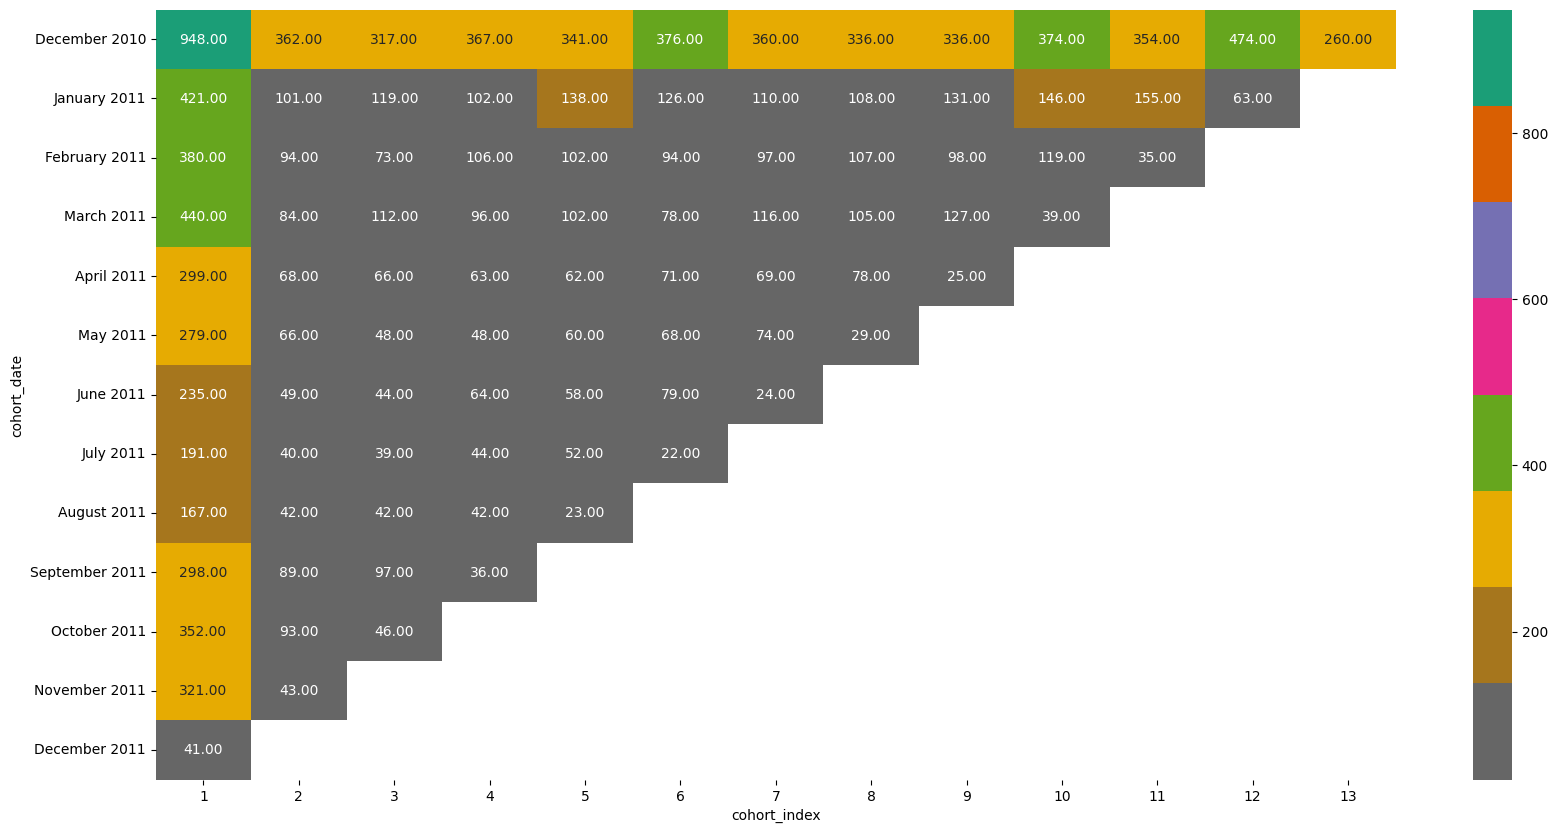

In [40]:
plt.figure(figsize = (20, 10))
sns.heatmap(cohort_table, annot = True, cmap = "Dark2_r", fmt = ".2f")

In [41]:
## get the retention rate in pencentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:, 0], axis = 0)
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort_date'>

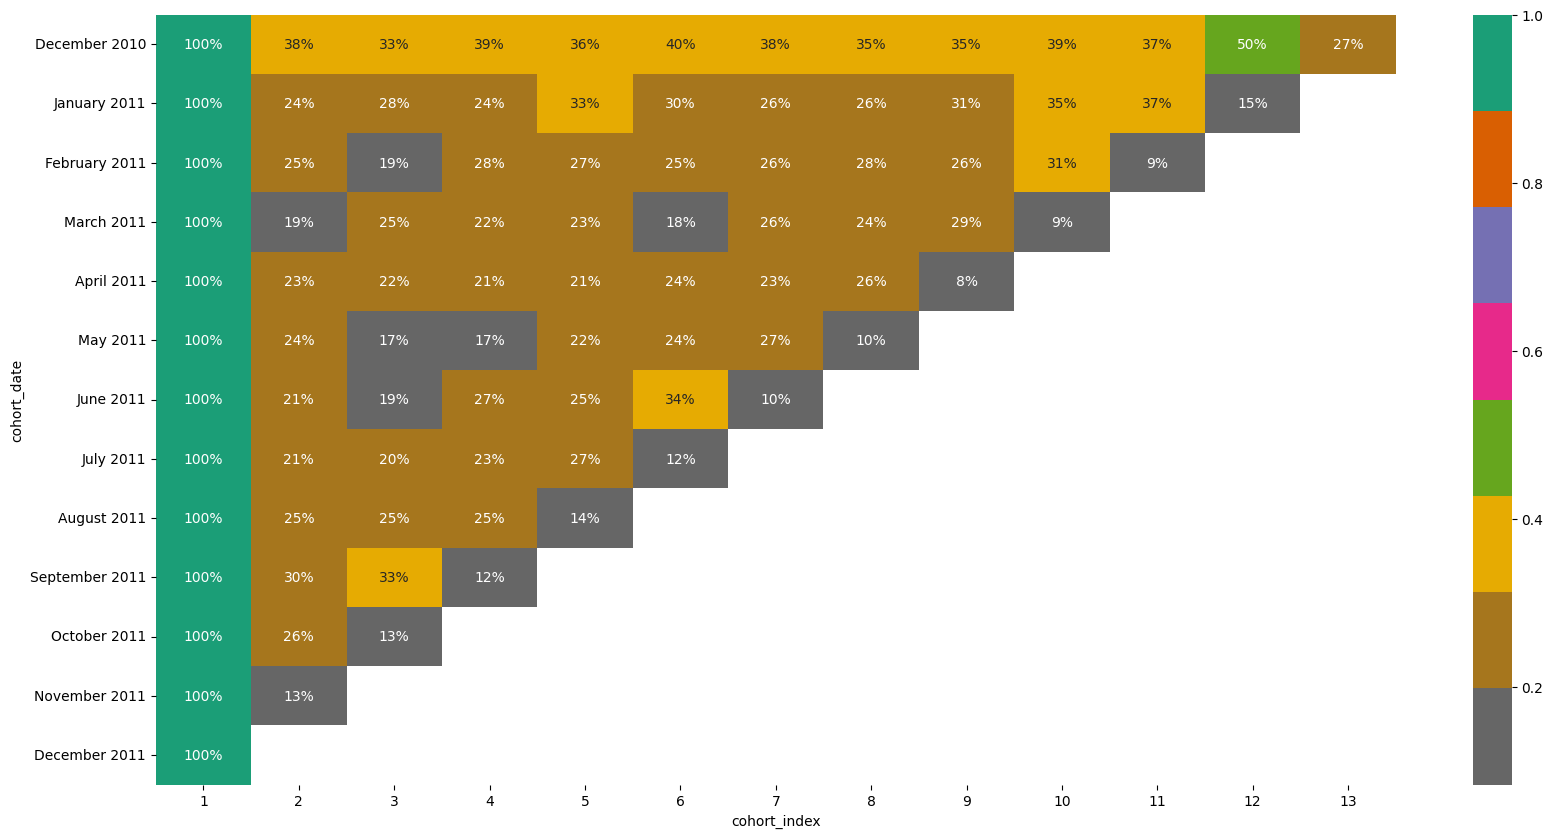

In [42]:
plt.figure(figsize = (20, 10))
sns.heatmap(new_cohort_table, annot = True, cmap = "Dark2_r", fmt = ".0%")

## Quantity bought

In [43]:
quantity_bought = df.groupby(["cohort_date", "cohort_index"])["Quantity"].sum().reset_index()
quantity_bought

,cohort_date,cohort_index,Quantity
0,2010-12-01,1,1350834
1,2010-12-01,2,546873
2,2010-12-01,3,462374
3,2010-12-01,4,613244
4,2010-12-01,5,510943
...,...,...,...
86,2011-10-01,2,181888
87,2011-10-01,3,44776
88,2011-11-01,1,574330
89,2011-11-01,2,56021


In [44]:
quantity_table = quantity_bought.pivot(index = "cohort_date", columns = ["cohort_index"], values = "Quantity")
quantity_table.index = quantity_table.index.strftime("%B %Y")

quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
December 2010,1350834.0,546873.0,462374.0,613244.0,510943.0,636443.0,597676.0,604504.0,600481.0,757806.0,725896.0,1165046.0,375469.0
January 2011,559013.0,121074.0,155931.0,120023.0,194675.0,166585.0,144835.0,149848.0,200661.0,258400.0,330607.0,76504.0,NaN
February 2011,450020.0,74008.0,98850.0,122918.0,111386.0,104214.0,108442.0,135276.0,151180.0,145405.0,21787.0,NaN,NaN
March 2011,563434.0,74215.0,125519.0,119480.0,122078.0,107554.0,139852.0,182259.0,212009.0,49685.0,NaN,NaN,NaN
April 2011,371021.0,71541.0,66410.0,65115.0,70639.0,105065.0,97319.0,110572.0,27119.0,NaN,NaN,NaN,NaN
May 2011,308885.0,55453.0,44637.0,45690.0,76473.0,118534.0,97156.0,41183.0,NaN,NaN,NaN,NaN,NaN
June 2011,285867.0,47847.0,35516.0,76483.0,88504.0,127400.0,31264.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,254889.0,25983.0,68721.0,69466.0,91529.0,26831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,243542.0,80156.0,144849.0,141888.0,45405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort_date'>

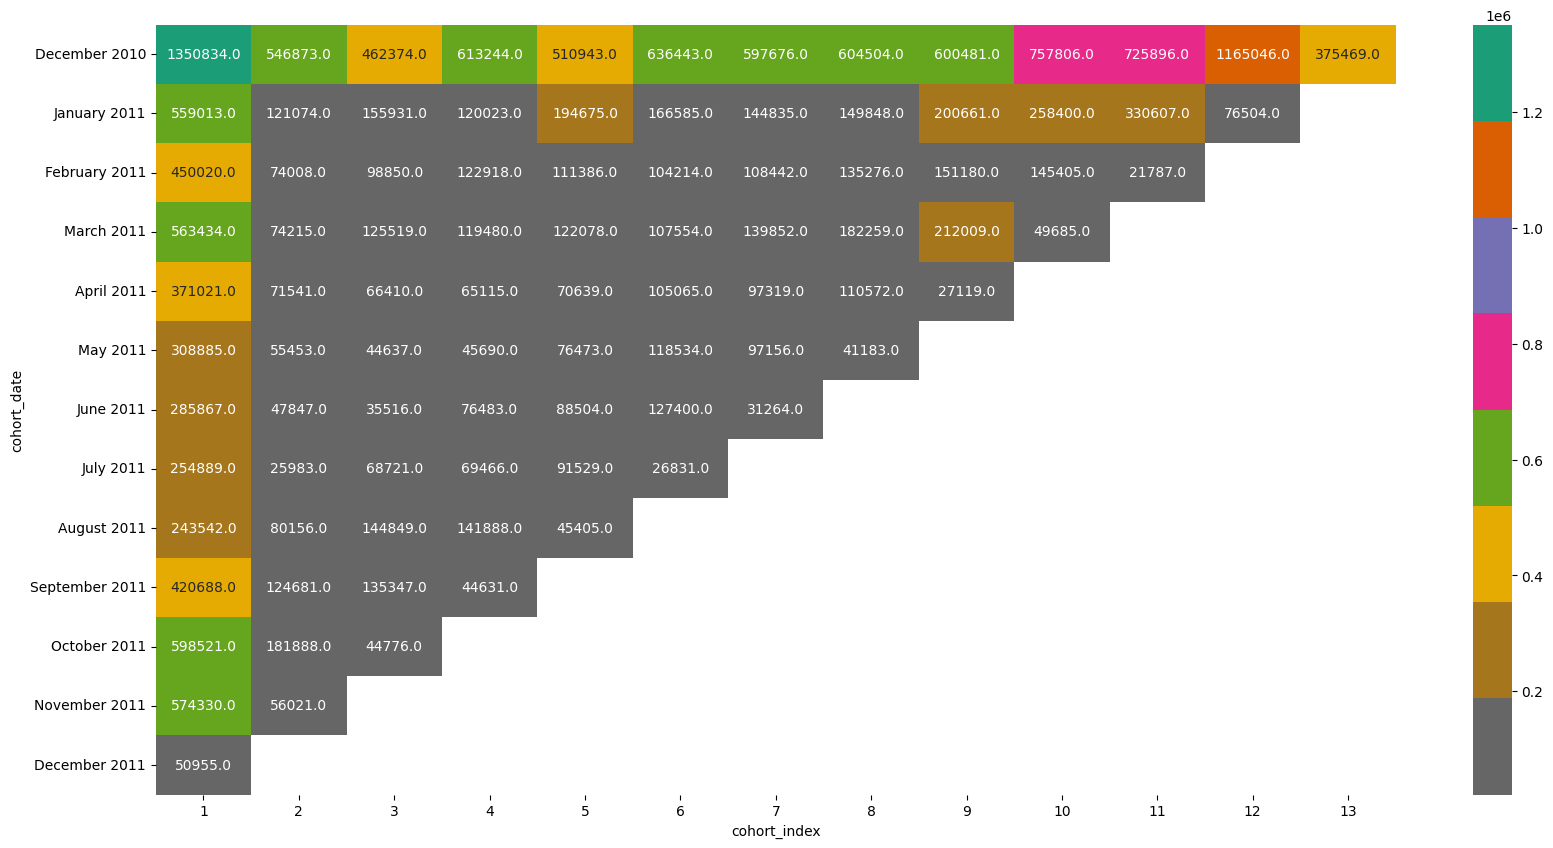

In [45]:
plt.figure(figsize =(20, 10))
sns.heatmap(quantity_table, annot = True, cmap = "Dark2_r", fmt = ".1f")

In [46]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort_date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1


In [47]:
df.columns

Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'StockCode', 'Description',
       'Quantity', 'UnitPrice', 'Country', 'cohort_date', 'cohort_index'],
      dtype='object')

In [48]:
def get_frequency(df):
    frequency = df.groupby("CustomerID")["InvoiceNo"].nunique()  # Group by CustomerID and count unique invoices
    df = df.merge(frequency.rename("frequency"), on="CustomerID", how="left")  # Add frequency back to the DataFrame
    return df

In [49]:
df = get_frequency(df)

In [50]:

df.head(20)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort_date,cohort_index,frequency
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1,35
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1,35
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1,35
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1,35
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1,35
5,536365,2010-12-01,17850.0,SC7895,Toys,41,45.31,Sierra Leone,2010-12-01,1,35
6,536365,2010-12-01,17850.0,SC8608,Books,44,39.31,Benin,2010-12-01,1,35
7,536366,2010-12-01,17850.0,SC3216,Toys,47,77.35,Burkina Faso,2010-12-01,1,35
8,536366,2010-12-01,17850.0,SC1236,Kitchenware,19,35.11,Nigeria,2010-12-01,1,35
9,536367,2010-12-01,13047.0,SC4513,Furniture,55,3.21,Cote d'Ivoire,2010-12-01,1,18


In [51]:
df.columns.tolist()

['InvoiceNo',
 'InvoiceDate',
 'CustomerID',
 'StockCode',
 'Description',
 'Quantity',
 'UnitPrice',
 'Country',
 'cohort_date',
 'cohort_index',
 'frequency']

In [52]:
features_for_scaling = ["Quantity", "UnitPrice", "cohort_index", "frequency"]
features_for_scaling

['Quantity', 'UnitPrice', 'cohort_index', 'frequency']

In [53]:
data_to_scale = df[features_for_scaling]

#data_to_scale = data_to_scale.fillna(0)

In [54]:
# Preparing data for clustering
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_features = scaler.fit_transform(data_to_scale)

#convert the result back to a DataFrame for easier manipulation
scaled_df = pd.DataFrame(scaled_features, columns=features_for_scaling)

scaled_df.head()

,Quantity,UnitPrice,cohort_index,frequency
0,0.502947,-1.408588,-1.084369,0.258799
1,1.541984,-1.080307,-1.084369,0.258799
2,0.953196,0.385410,-1.084369,0.258799
3,-1.228782,-0.901117,-1.084369,0.258799
4,-0.016572,-0.407645,-1.084369,0.258799


In [55]:
# Preparing data for clustering

#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#scaled_features = scaler.fit_transform(features_for_scaling)

#scaled_df = pd.DataFrame(scaled_features, columns=features_for_scaling.columns)
#scaled_df.head()

## KMeans Clustering Method

In [56]:
from sklearn.cluster import KMeans

# Find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    
    # Fit the model
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

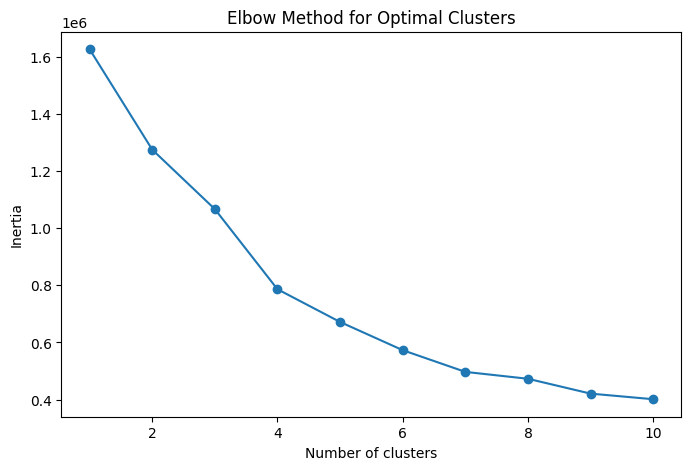

In [57]:
# Plot the elbow curve inertial
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [58]:
# fit Kmeans with optimal cluster from elbow curve
optimal_k = 4
kmeansmeans = KMeans(n_clusters = optimal_k, random_state = 42)
kmeans.fit(scaled_features)

# Add cluster labels to the DataFrame
scaled_df['Cluster'] = kmeans.labels_

# Visualize cluster centroids
print(kmeans.cluster_centers_)

[[ 8.67991454e-01  8.99174440e-01 -7.95134596e-01 -2.97079528e-01]
 [-1.08016593e-01 -6.97399807e-01 -8.13747871e-01 -3.11568795e-01]
 [ 3.34657112e-01 -9.86028197e-01  1.15904015e+00 -1.45298877e-01]
 [ 1.44762986e-02  3.38987174e-03  8.68695484e-01  4.70797830e+00]
 [ 1.14449456e+00 -8.74723250e-01 -6.33253081e-01 -2.78329046e-01]
 [ 4.20728733e-03 -6.40665053e-03  6.50031303e-01  2.68777574e+00]
 [-9.05330840e-01  9.10085310e-01 -7.32259358e-01 -2.89458236e-01]
 [-9.51403173e-01  5.31552568e-01  1.10416129e+00 -1.49860236e-01]
 [-1.19752395e+00 -9.66605898e-01 -3.70257355e-01 -2.52471026e-01]
 [ 8.57807909e-01  8.23549720e-01  9.81095713e-01 -1.60910320e-01]]


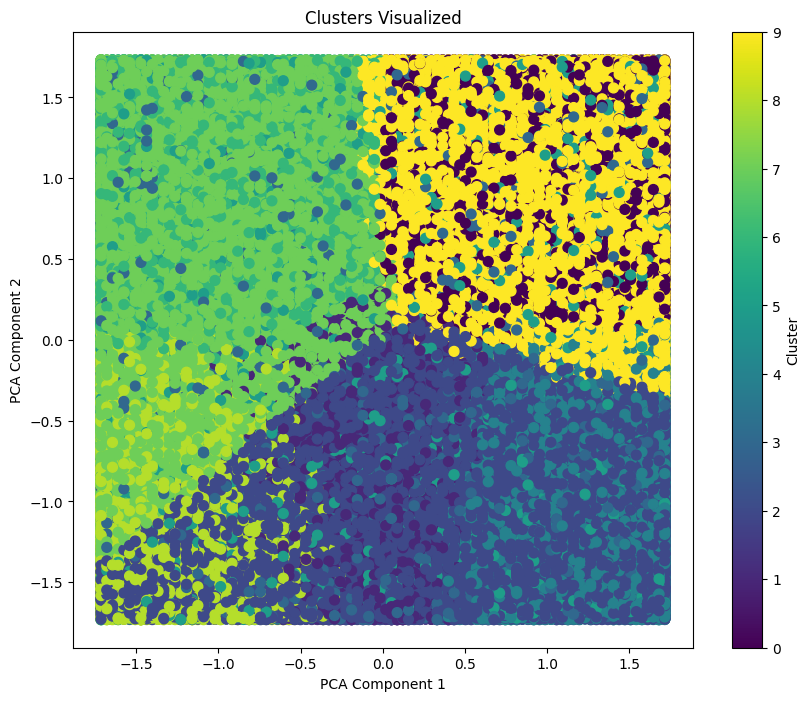

In [59]:
from sklearn.decomposition import PCA



# Plot clusters
plt.figure(figsize=(10, 8))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=scaled_df['Cluster'], cmap='viridis', s=50)
plt.title("Clusters Visualized")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [60]:
from sklearn.metrics import silhouette_score

# Evaluate clustering performance
silhouette = silhouette_score(scaled_features, scaled_df['Cluster'])
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.25762947441589557


## DBSCAN Clustering Method

In [61]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=10)
scaled_df['Cluster'] = dbscan.fit_predict(scaled_features)

# Visualize cluster distribution
print(scaled_df['Cluster'].value_counts())

Cluster
 0      112632
-1       91286
 20      22340
 161     20637
 152     19950
         ...  
 215         4
 211         4
 119         4
 207         4
 209         3
Name: count, Length: 382, dtype: int64


In [62]:
noise_points = scaled_df[scaled_df['Cluster'] == -1]
print(noise_points)

        Quantity  UnitPrice  cohort_index  frequency  Cluster
0       0.502947  -1.408588     -1.084369   0.258799       -1
1       1.541984  -1.080307     -1.084369   0.258799       -1
2       0.953196   0.385410     -1.084369   0.258799       -1
3      -1.228782  -0.901117     -1.084369   0.258799       -1
4      -0.016572  -0.407645     -1.084369   0.258799       -1
...          ...        ...           ...        ...      ...
406809 -1.332685  -0.916866      0.729352  -0.092854       -1
406810 -0.362917   0.199221      2.024868   0.368690       -1
406811  1.126369   1.168666      2.024868   0.368690       -1
406812 -0.293648  -0.234055      2.024868   0.368690       -1
406813 -1.540493  -1.272446      2.024868   0.368690       -1

[91286 rows x 5 columns]


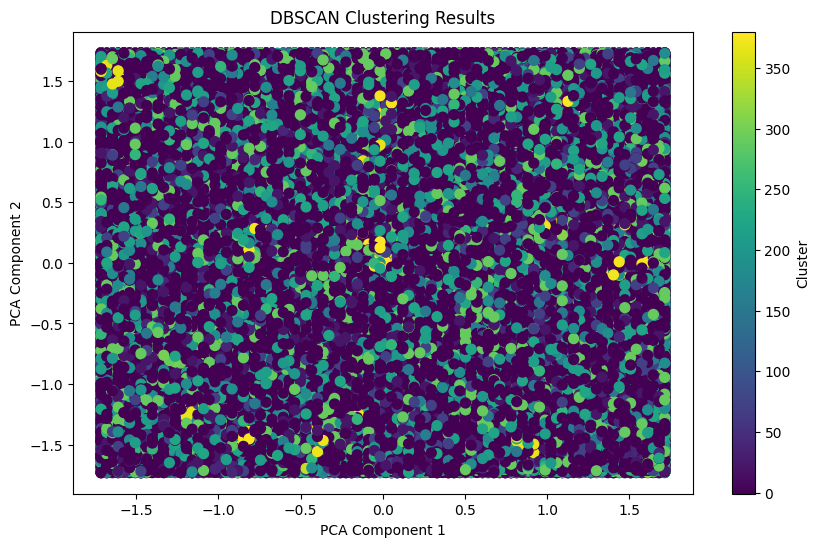

In [63]:



plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=scaled_df['Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [64]:

# Evaluate clustering performance
silhouette = silhouette_score(scaled_features, scaled_df['Cluster'])
print(f"Silhouette Score: {silhouette}")

Silhouette Score: -0.6973196753099549


## Gaussian Clustering Method


In [65]:
from sklearn.mixture import GaussianMixture

# Apply GMM
gmm = GaussianMixture(n_components=3, random_state=42)
scaled_df['Cluster'] = gmm.fit_predict(scaled_features)

# Visualize cluster probabilities
print(gmm.predict_proba(scaled_features))

[[1.26265845e-07 9.99923071e-01 7.68031434e-05]
 [8.67095098e-07 9.99927529e-01 7.16042320e-05]
 [1.77563403e-04 9.99819593e-01 2.84408104e-06]
 ...
 [9.64758387e-02 1.84268211e-02 8.85097340e-01]
 [9.86153150e-01 9.65473565e-03 4.19211422e-03]
 [2.75105531e-01 2.37020851e-02 7.01192384e-01]]


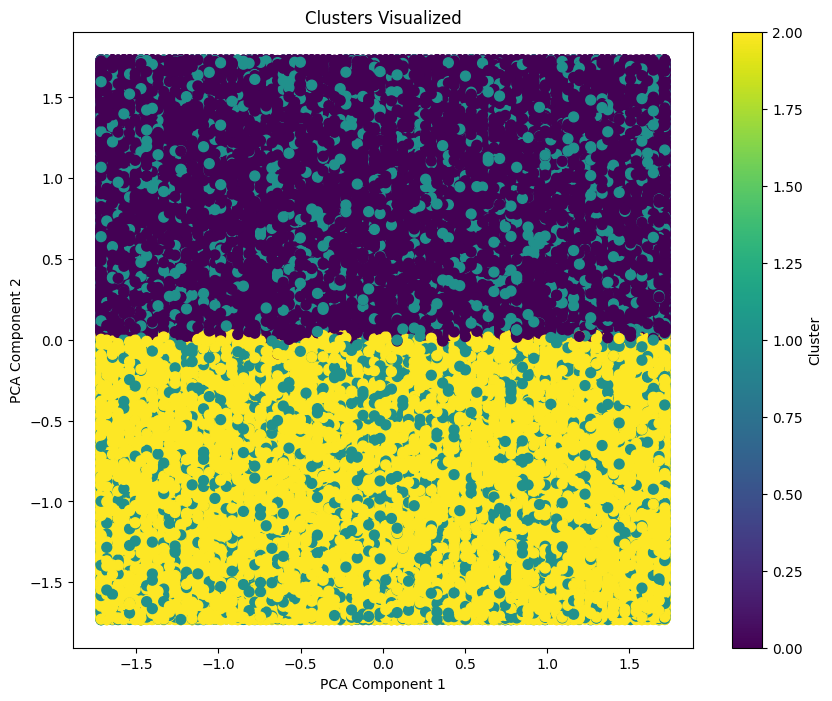

In [66]:


# Plot clusters
plt.figure(figsize=(10, 8))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=scaled_df['Cluster'], cmap='viridis', s=50)
plt.title("Clusters Visualized")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [67]:


# Evaluate clustering performance
silhouette = silhouette_score(scaled_features, scaled_df['Cluster'])
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.18014035250203067
